In [15]:
import pandas as pd
import ast
import numpy as np
import matplotlib as plt
%matplotlib inline

### Pull in Movie Data for Cleaning and Analysis ###

In [16]:
# read in movies data csv file and assign to variable
movies_final = pd.read_csv('movies_final.csv')

In [17]:
movies_final.head()

,Unnamed: 0,Title,Director,Release Date,Revenue,Writers,Rotten Tomatoes Review,Number of RT Reviews,Year,Genres,Average IMDB Rating,Number of IMDB Votes,Popularity,Average TMDB Rating,Number of TMDB Votes,Release Month
0,0,Chicken Run,"['Peter Lord', 'Nick Park']","Jun 21, 2000","$106,604,314","['Jack Rosenthal', 'Karey Kirkpatrick']",97%,171.0,2000.0,"Adventure,Animation,Comedy",7.0,162266.0,13.991,6.6,2438.0,6.0
1,3,The Taste of Others,['Agnès Jaoui'],"Jan 1, 2000",\n\n 112 minute...,"['Jean-Pierre Bacri', 'Agnès Jaoui']",NaN,NaN,NaN,NaN,NaN,NaN,5.907,6.7,97.0,3.0
2,4,The Life and Times of Hank Greenberg,['Aviva Kempner'],"Jan 12, 2000",\n\n 89 minutes...,['Aviva Kempner'],97%,65.0,2000.0,NaN,NaN,NaN,0.600,6.0,6.0,1.0
3,5,Yi Yi,['Edward Yang'],"Oct 6, 2000",\n\n 173 minute...,['Edward Yang'],96%,83.0,2000.0,"Drama,Romance",8.1,16786.0,6.590,8.0,156.0,9.0
4,10956,You Can Count On Me,['Kenneth Lonergan'],"Nov 10, 2000","$8,409,329",['Kenneth Lonergan'],95%,103.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# drop unnecessary columns
movies_final = movies_final.drop(['Unnamed: 0'], axis=1)

In [24]:
# look at general statistics of each column
movies_final.describe()

,Number of RT Reviews,Year,Average IMDB Rating,Number of IMDB Votes,Popularity,Average TMDB Rating,Number of TMDB Votes,Release Month
count,1099.000000,1099.000000,717.000000,7.170000e+02,1050.000000,1050.000000,1050.000000,1048.000000
mean,142.744313,2008.838944,7.308368,1.533094e+05,9.011730,6.908381,1399.637143,6.939885
std,81.336464,5.397369,0.601522,2.301711e+05,10.123373,1.006910,2723.963986,3.330163
min,39.000000,2000.000000,2.600000,5.000000e+00,0.600000,0.000000,0.000000,1.000000
25%,73.000000,2004.000000,7.000000,9.153000e+03,3.503750,6.600000,49.000000,4.000000
50%,127.000000,2009.000000,7.300000,5.199600e+04,7.009000,7.000000,229.500000,7.000000
75%,196.000000,2013.000000,7.700000,2.106640e+05,11.046500,7.400000,1335.250000,10.000000
max,470.000000,2018.000000,9.500000,2.033112e+06,196.775000,10.000000,21451.000000,12.000000


In [25]:
#count of NaN values in each column
movies_final.isna().sum()

Title                       0
Director                    0
Release Date                0
Revenue                     0
Writers                     0
Rotten Tomatoes Review    103
Number of RT Reviews      103
Year                      103
Genres                    485
Average IMDB Rating       485
Number of IMDB Votes      485
Popularity                152
Average TMDB Rating       152
Number of TMDB Votes      152
Release Month             154
dtype: int64

In [26]:
# fill NaN values in average rating and number of votes columns for IMDB and TMDB with average values
movies_final['Average IMDB Rating'] = movies_final['Average IMDB Rating'].fillna(value=7.3)
movies_final['Number of IMDB Votes'] = movies_final['Number of IMDB Votes'].fillna(value=153309)
movies_final['Average TMDB Rating'] = movies_final['Average TMDB Rating'].fillna(value=6.9)
movies_final['Number of TMDB Votes'] = movies_final['Number of TMDB Votes'].fillna(value=1399)
movies_final['Number of RT Reviews'] = movies_final['Number of RT Reviews'].fillna(value=143)

In [27]:
movies_final.head()

,Title,Director,Release Date,Revenue,Writers,Rotten Tomatoes Review,Number of RT Reviews,Year,Genres,Average IMDB Rating,Number of IMDB Votes,Popularity,Average TMDB Rating,Number of TMDB Votes,Release Month
0,Chicken Run,"['Peter Lord', 'Nick Park']","Jun 21, 2000","$106,604,314","['Jack Rosenthal', 'Karey Kirkpatrick']",97%,171.0,2000.0,"Adventure,Animation,Comedy",7.0,162266.0,13.991,6.6,2438.0,6.0
1,The Taste of Others,['Agnès Jaoui'],"Jan 1, 2000",\n\n 112 minute...,"['Jean-Pierre Bacri', 'Agnès Jaoui']",NaN,143.0,NaN,NaN,7.3,153309.0,5.907,6.7,97.0,3.0
2,The Life and Times of Hank Greenberg,['Aviva Kempner'],"Jan 12, 2000",\n\n 89 minutes...,['Aviva Kempner'],97%,65.0,2000.0,NaN,7.3,153309.0,0.600,6.0,6.0,1.0
3,Yi Yi,['Edward Yang'],"Oct 6, 2000",\n\n 173 minute...,['Edward Yang'],96%,83.0,2000.0,"Drama,Romance",8.1,16786.0,6.590,8.0,156.0,9.0
4,You Can Count On Me,['Kenneth Lonergan'],"Nov 10, 2000","$8,409,329",['Kenneth Lonergan'],95%,103.0,2000.0,NaN,7.3,153309.0,NaN,6.9,1399.0,NaN


In [28]:
# pull out the directors from dataframe into an individual list for cleaning
director = movies_final['Director'].values.tolist()

In [29]:
director

["['Peter Lord', 'Nick Park']",
 "['Agnès Jaoui']",
 "['Aviva Kempner']",
 "['Edward Yang']",
 "['Kenneth Lonergan']",
 "['Christopher Nolan']",
 "['Christopher Guest']",
 "['Mike Hodges']",
 "['Marc Singer']",
 "['Yimou Zhang']",
 "['Julien Temple']",
 "['Cameron Crowe']",
 "['Robert Zemeckis']",
 "['Jonathan Glazer']",
 "['Karyn Kusama']",
 "['David Mamet']",
 "['Jay Roach']",
 "['Steven Soderbergh']",
 "['Stephen Daldry']",
 "['Cesc Gay']",
 "['Kinji Fukasaku']",
 "['Neil LaBute']",
 "['Roger Donaldson']",
 "['Kwon-taek Im']",
 "['E. Elias Merhige']",
 "['Curtis Hanson']",
 "['Buzz Kulik']",
 "['Claude Chabrol']",
 "['Gina Prince-Bythewood']",
 "['Ed Harris']",
 "['James Algar', 'Gaëtan Brizzi', 'Paul Brizzi', 'Hendel Butoy', 'Francis Glebas', 'Eric Goldberg', 'Don Hahn', 'Pixote Hunt']",
 "['Joe Mantegna']",
 "['Darren Aronofsky']",
 "['Tom Dey']",
 "['Anh Hung Tran']",
 "['Ridley Scott']",
 "['Clint Eastwood']",
 "['Philip Kaufman']",
 "['David Shapiro', 'Laurie Gwen Shapiro', 'La

In [30]:
# remove the brackets in the strings around each director unit
director = [x.replace('[', '').replace(']', '') for x in director]

In [31]:
director

["'Peter Lord', 'Nick Park'",
 "'Agnès Jaoui'",
 "'Aviva Kempner'",
 "'Edward Yang'",
 "'Kenneth Lonergan'",
 "'Christopher Nolan'",
 "'Christopher Guest'",
 "'Mike Hodges'",
 "'Marc Singer'",
 "'Yimou Zhang'",
 "'Julien Temple'",
 "'Cameron Crowe'",
 "'Robert Zemeckis'",
 "'Jonathan Glazer'",
 "'Karyn Kusama'",
 "'David Mamet'",
 "'Jay Roach'",
 "'Steven Soderbergh'",
 "'Stephen Daldry'",
 "'Cesc Gay'",
 "'Kinji Fukasaku'",
 "'Neil LaBute'",
 "'Roger Donaldson'",
 "'Kwon-taek Im'",
 "'E. Elias Merhige'",
 "'Curtis Hanson'",
 "'Buzz Kulik'",
 "'Claude Chabrol'",
 "'Gina Prince-Bythewood'",
 "'Ed Harris'",
 "'James Algar', 'Gaëtan Brizzi', 'Paul Brizzi', 'Hendel Butoy', 'Francis Glebas', 'Eric Goldberg', 'Don Hahn', 'Pixote Hunt'",
 "'Joe Mantegna'",
 "'Darren Aronofsky'",
 "'Tom Dey'",
 "'Anh Hung Tran'",
 "'Ridley Scott'",
 "'Clint Eastwood'",
 "'Philip Kaufman'",
 "'David Shapiro', 'Laurie Gwen Shapiro', 'Laurie Shapiro'",
 "'Gus Van Sant'",
 "'Boaz Yakin'",
 "'Joel Schumacher'",
 "'

In [32]:
# move the updated list of directors back into dataframe
movies_final['Director'] = director

In [33]:
movies_final.head()

,Title,Director,Release Date,Revenue,Writers,Rotten Tomatoes Review,Number of RT Reviews,Year,Genres,Average IMDB Rating,Number of IMDB Votes,Popularity,Average TMDB Rating,Number of TMDB Votes,Release Month
0,Chicken Run,"'Peter Lord', 'Nick Park'","Jun 21, 2000","$106,604,314","['Jack Rosenthal', 'Karey Kirkpatrick']",97%,171.0,2000.0,"Adventure,Animation,Comedy",7.0,162266.0,13.991,6.6,2438.0,6.0
1,The Taste of Others,'Agnès Jaoui',"Jan 1, 2000",\n\n 112 minute...,"['Jean-Pierre Bacri', 'Agnès Jaoui']",NaN,143.0,NaN,NaN,7.3,153309.0,5.907,6.7,97.0,3.0
2,The Life and Times of Hank Greenberg,'Aviva Kempner',"Jan 12, 2000",\n\n 89 minutes...,['Aviva Kempner'],97%,65.0,2000.0,NaN,7.3,153309.0,0.600,6.0,6.0,1.0
3,Yi Yi,'Edward Yang',"Oct 6, 2000",\n\n 173 minute...,['Edward Yang'],96%,83.0,2000.0,"Drama,Romance",8.1,16786.0,6.590,8.0,156.0,9.0
4,You Can Count On Me,'Kenneth Lonergan',"Nov 10, 2000","$8,409,329",['Kenneth Lonergan'],95%,103.0,2000.0,NaN,7.3,153309.0,NaN,6.9,1399.0,NaN


In [34]:
# convert each value in the Director column into a pandas series
directors = movies_final['Director'].apply(pd.Series)

In [35]:
# rename the columns of the new series to "Director_' and number of column
directors = directors.rename(columns = lambda x: 'Director_' + str(x))

In [36]:
directors.head()

,Director_0
0,"'Peter Lord', 'Nick Park'"
1,'Agnès Jaoui'
2,'Aviva Kempner'
3,'Edward Yang'
4,'Kenneth Lonergan'


In [37]:
# concatenate the new pandas series with the movies dataframe
movies_final = pd.concat([movies_final[:], directors[:]], axis=1)

In [38]:
movies_final.head()

,Title,Director,Release Date,Revenue,Writers,Rotten Tomatoes Review,Number of RT Reviews,Year,Genres,Average IMDB Rating,Number of IMDB Votes,Popularity,Average TMDB Rating,Number of TMDB Votes,Release Month,Director_0
0,Chicken Run,"'Peter Lord', 'Nick Park'","Jun 21, 2000","$106,604,314","['Jack Rosenthal', 'Karey Kirkpatrick']",97%,171.0,2000.0,"Adventure,Animation,Comedy",7.0,162266.0,13.991,6.6,2438.0,6.0,"'Peter Lord', 'Nick Park'"
1,The Taste of Others,'Agnès Jaoui',"Jan 1, 2000",\n\n 112 minute...,"['Jean-Pierre Bacri', 'Agnès Jaoui']",NaN,143.0,NaN,NaN,7.3,153309.0,5.907,6.7,97.0,3.0,'Agnès Jaoui'
2,The Life and Times of Hank Greenberg,'Aviva Kempner',"Jan 12, 2000",\n\n 89 minutes...,['Aviva Kempner'],97%,65.0,2000.0,NaN,7.3,153309.0,0.600,6.0,6.0,1.0,'Aviva Kempner'
3,Yi Yi,'Edward Yang',"Oct 6, 2000",\n\n 173 minute...,['Edward Yang'],96%,83.0,2000.0,"Drama,Romance",8.1,16786.0,6.590,8.0,156.0,9.0,'Edward Yang'
4,You Can Count On Me,'Kenneth Lonergan',"Nov 10, 2000","$8,409,329",['Kenneth Lonergan'],95%,103.0,2000.0,NaN,7.3,153309.0,NaN,6.9,1399.0,NaN,'Kenneth Lonergan'


### Save Data In SQL Database ###

In [39]:
import sqlite3

In [40]:
# convert dataframe of cleaned overall data into sql database
connection = sqlite3.connect('movies_final2.db')
cursor = connection.cursor()
movies_final.to_sql('movies_final', connection)

/Users/A/anaconda3/envs/Flatiron/lib/python3.7/site-packages/pandas/core/generic.py:2532: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype, method=method)


In [41]:
cursor.close()
connection.close()

### Subsets of Data and Plotting ###

In [42]:
# pull genres pandas series into a list
genres = movies_final['Genres'].values.tolist()

In [43]:
# convert it into a separate series
genres = pd.Series(genres)

In [44]:
# split each value by comma
genres.str.split(',')

0        [Adventure, Animation, Comedy]
1                                   NaN
2                                   NaN
3                      [Drama, Romance]
4                                   NaN
5                   [Mystery, Thriller]
6                              [Comedy]
7                                   NaN
8                         [Documentary]
9                                   NaN
10      [Biography, Documentary, Music]
11           [Adventure, Comedy, Drama]
12          [Adventure, Drama, Romance]
13             [Crime, Drama, Thriller]
14                       [Drama, Sport]
15                      [Comedy, Drama]
16                    [Comedy, Romance]
17                   [Biography, Drama]
18              [Drama, Music, Romance]
19                                  NaN
20           [Adventure, Drama, Sci-Fi]
21               [Comedy, Crime, Drama]
22           [Drama, History, Thriller]
23                                  NaN
24                      [Drama, Horror]


In [45]:
# convert each value as series
genre = genres.apply(pd.Series)

In [46]:
# rename columns as 'genre_' and index of the value
genre = genre.rename(columns=lambda x: 'genre_' + str(x))

In [47]:
# concatenate the new series with the movies dataframe
movies_final = pd.concat([movies_final[:], genre[:]], axis=1)

In [48]:
movies_final.head()

,Title,Director,Release Date,Revenue,Writers,Rotten Tomatoes Review,Number of RT Reviews,Year,Genres,Average IMDB Rating,Number of IMDB Votes,Popularity,Average TMDB Rating,Number of TMDB Votes,Release Month,Director_0,genre_0
0,Chicken Run,"'Peter Lord', 'Nick Park'","Jun 21, 2000","$106,604,314","['Jack Rosenthal', 'Karey Kirkpatrick']",97%,171.0,2000.0,"Adventure,Animation,Comedy",7.0,162266.0,13.991,6.6,2438.0,6.0,"'Peter Lord', 'Nick Park'","Adventure,Animation,Comedy"
1,The Taste of Others,'Agnès Jaoui',"Jan 1, 2000",\n\n 112 minute...,"['Jean-Pierre Bacri', 'Agnès Jaoui']",NaN,143.0,NaN,NaN,7.3,153309.0,5.907,6.7,97.0,3.0,'Agnès Jaoui',NaN
2,The Life and Times of Hank Greenberg,'Aviva Kempner',"Jan 12, 2000",\n\n 89 minutes...,['Aviva Kempner'],97%,65.0,2000.0,NaN,7.3,153309.0,0.600,6.0,6.0,1.0,'Aviva Kempner',NaN
3,Yi Yi,'Edward Yang',"Oct 6, 2000",\n\n 173 minute...,['Edward Yang'],96%,83.0,2000.0,"Drama,Romance",8.1,16786.0,6.590,8.0,156.0,9.0,'Edward Yang',"Drama,Romance"
4,You Can Count On Me,'Kenneth Lonergan',"Nov 10, 2000","$8,409,329",['Kenneth Lonergan'],95%,103.0,2000.0,NaN,7.3,153309.0,NaN,6.9,1399.0,NaN,'Kenneth Lonergan',NaN


In [49]:
# drop NaN values and split each value by comma
movies_final['Genre_1'] = movies_final['genre_0'].dropna().astype(str).map(lambda x: x.split(',')[0])

In [50]:
# pull out the genres into a list 
genre_list = movies_final['genre_0'].astype(str).values.tolist()

In [51]:
genre_list

['Adventure,Animation,Comedy',
 'nan',
 'nan',
 'Drama,Romance',
 'nan',
 'Mystery,Thriller',
 'Comedy',
 'nan',
 'Documentary',
 'nan',
 'Biography,Documentary,Music',
 'Adventure,Comedy,Drama',
 'Adventure,Drama,Romance',
 'Crime,Drama,Thriller',
 'Drama,Sport',
 'Comedy,Drama',
 'Comedy,Romance',
 'Biography,Drama',
 'Drama,Music,Romance',
 'nan',
 'Adventure,Drama,Sci-Fi',
 'Comedy,Crime,Drama',
 'Drama,History,Thriller',
 'nan',
 'Drama,Horror',
 'Comedy,Drama',
 'Drama',
 'nan',
 'nan',
 'Biography,Drama',
 'nan',
 'Drama',
 'Drama',
 'Action,Adventure,Comedy',
 'nan',
 'Action,Adventure,Drama',
 'Action,Adventure,Thriller',
 'Biography,Drama',
 'nan',
 'Drama',
 'Biography,Drama,Sport',
 'Drama,War',
 'nan',
 'Comedy,Drama,Family',
 'nan',
 'nan',
 'Drama,Mystery,Sci-Fi',
 'Crime,Drama,Mystery',
 'Crime,Drama',
 'Comedy,Drama,Romance',
 'Drama,History,Romance',
 'Crime,Drama,Musical',
 'Documentary',
 'Drama,Romance',
 'Comedy,Romance',
 'Comedy,Crime',
 'Comedy,Romance,Sport',


In [52]:
# split each string of multiple text in list by comma
genre_list = list(map(lambda x: x.split(','), genre_list))

In [53]:
genre_list

[['Adventure', 'Animation', 'Comedy'],
 ['nan'],
 ['nan'],
 ['Drama', 'Romance'],
 ['nan'],
 ['Mystery', 'Thriller'],
 ['Comedy'],
 ['nan'],
 ['Documentary'],
 ['nan'],
 ['Biography', 'Documentary', 'Music'],
 ['Adventure', 'Comedy', 'Drama'],
 ['Adventure', 'Drama', 'Romance'],
 ['Crime', 'Drama', 'Thriller'],
 ['Drama', 'Sport'],
 ['Comedy', 'Drama'],
 ['Comedy', 'Romance'],
 ['Biography', 'Drama'],
 ['Drama', 'Music', 'Romance'],
 ['nan'],
 ['Adventure', 'Drama', 'Sci-Fi'],
 ['Comedy', 'Crime', 'Drama'],
 ['Drama', 'History', 'Thriller'],
 ['nan'],
 ['Drama', 'Horror'],
 ['Comedy', 'Drama'],
 ['Drama'],
 ['nan'],
 ['nan'],
 ['Biography', 'Drama'],
 ['nan'],
 ['Drama'],
 ['Drama'],
 ['Action', 'Adventure', 'Comedy'],
 ['nan'],
 ['Action', 'Adventure', 'Drama'],
 ['Action', 'Adventure', 'Thriller'],
 ['Biography', 'Drama'],
 ['nan'],
 ['Drama'],
 ['Biography', 'Drama', 'Sport'],
 ['Drama', 'War'],
 ['nan'],
 ['Comedy', 'Drama', 'Family'],
 ['nan'],
 ['nan'],
 ['Drama', 'Mystery', 'Sci

In [54]:
#pull string from eaach list (list of lists) and put in new list
genres = []
for i in range(len(genre_list)):
    for j in range(len(genre_list[i])):
        genres.append(genre_list[i][j])

In [55]:
genres

['Adventure',
 'Animation',
 'Comedy',
 'nan',
 'nan',
 'Drama',
 'Romance',
 'nan',
 'Mystery',
 'Thriller',
 'Comedy',
 'nan',
 'Documentary',
 'nan',
 'Biography',
 'Documentary',
 'Music',
 'Adventure',
 'Comedy',
 'Drama',
 'Adventure',
 'Drama',
 'Romance',
 'Crime',
 'Drama',
 'Thriller',
 'Drama',
 'Sport',
 'Comedy',
 'Drama',
 'Comedy',
 'Romance',
 'Biography',
 'Drama',
 'Drama',
 'Music',
 'Romance',
 'nan',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'Comedy',
 'Crime',
 'Drama',
 'Drama',
 'History',
 'Thriller',
 'nan',
 'Drama',
 'Horror',
 'Comedy',
 'Drama',
 'Drama',
 'nan',
 'nan',
 'Biography',
 'Drama',
 'nan',
 'Drama',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'nan',
 'Action',
 'Adventure',
 'Drama',
 'Action',
 'Adventure',
 'Thriller',
 'Biography',
 'Drama',
 'nan',
 'Drama',
 'Biography',
 'Drama',
 'Sport',
 'Drama',
 'War',
 'nan',
 'Comedy',
 'Drama',
 'Family',
 'nan',
 'nan',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Mystery',
 'Crime',
 'Dr

In [56]:
# create a new separate dataframe with the data from the list in new column Genre
genres = pd.DataFrame(genres, columns = ['Genre'])

In [57]:
genres.head()

,Genre
0,Adventure
1,Animation
2,Comedy
3,nan
4,nan


In [58]:
# look at the counts of the unique values
genres.Genre.value_counts()

nan            485
Drama          447
Comedy         205
Documentary    127
Romance        111
Adventure      108
Crime          102
Biography       90
Thriller        78
Action          75
Mystery         49
Animation       47
Music           40
Horror          39
History         39
Sci-Fi          38
Family          29
Sport           28
Fantasy         28
War             22
Short            7
Musical          5
Western          5
Talk-Show        4
News             2
Name: Genre, dtype: int64

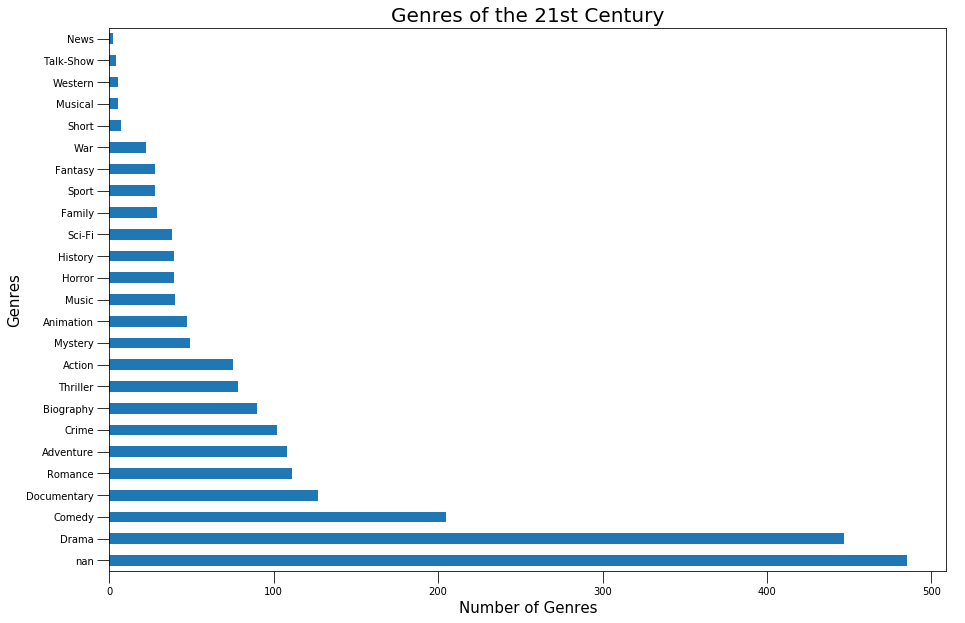

In [59]:
# plot genres and their counts
genre_plot = genres['Genre'].value_counts().plot(kind='barh', figsize=(15,10))
genre_plot.set_xlabel('Number of Genres', size=15)
genre_plot.set_ylabel('Genres', size=15)
genre_plot.set_title('Genres of the 21st Century', size=20)
genre_plot.tick_params(axis='x', size=12)
genre_plot.tick_params(axis='y', size=12)

In [60]:
# pull directors into a list
directors = movies_final['Director_0'].values.tolist()

In [61]:
directors

["'Peter Lord', 'Nick Park'",
 "'Agnès Jaoui'",
 "'Aviva Kempner'",
 "'Edward Yang'",
 "'Kenneth Lonergan'",
 "'Christopher Nolan'",
 "'Christopher Guest'",
 "'Mike Hodges'",
 "'Marc Singer'",
 "'Yimou Zhang'",
 "'Julien Temple'",
 "'Cameron Crowe'",
 "'Robert Zemeckis'",
 "'Jonathan Glazer'",
 "'Karyn Kusama'",
 "'David Mamet'",
 "'Jay Roach'",
 "'Steven Soderbergh'",
 "'Stephen Daldry'",
 "'Cesc Gay'",
 "'Kinji Fukasaku'",
 "'Neil LaBute'",
 "'Roger Donaldson'",
 "'Kwon-taek Im'",
 "'E. Elias Merhige'",
 "'Curtis Hanson'",
 "'Buzz Kulik'",
 "'Claude Chabrol'",
 "'Gina Prince-Bythewood'",
 "'Ed Harris'",
 "'James Algar', 'Gaëtan Brizzi', 'Paul Brizzi', 'Hendel Butoy', 'Francis Glebas', 'Eric Goldberg', 'Don Hahn', 'Pixote Hunt'",
 "'Joe Mantegna'",
 "'Darren Aronofsky'",
 "'Tom Dey'",
 "'Anh Hung Tran'",
 "'Ridley Scott'",
 "'Clint Eastwood'",
 "'Philip Kaufman'",
 "'David Shapiro', 'Laurie Gwen Shapiro', 'Laurie Shapiro'",
 "'Gus Van Sant'",
 "'Boaz Yakin'",
 "'Joel Schumacher'",
 "'

In [62]:
# split each string of multiple text in list by comma
director_list = list(map(lambda x: x.split(','), directors))

In [63]:
director_list

[["'Peter Lord'", " 'Nick Park'"],
 ["'Agnès Jaoui'"],
 ["'Aviva Kempner'"],
 ["'Edward Yang'"],
 ["'Kenneth Lonergan'"],
 ["'Christopher Nolan'"],
 ["'Christopher Guest'"],
 ["'Mike Hodges'"],
 ["'Marc Singer'"],
 ["'Yimou Zhang'"],
 ["'Julien Temple'"],
 ["'Cameron Crowe'"],
 ["'Robert Zemeckis'"],
 ["'Jonathan Glazer'"],
 ["'Karyn Kusama'"],
 ["'David Mamet'"],
 ["'Jay Roach'"],
 ["'Steven Soderbergh'"],
 ["'Stephen Daldry'"],
 ["'Cesc Gay'"],
 ["'Kinji Fukasaku'"],
 ["'Neil LaBute'"],
 ["'Roger Donaldson'"],
 ["'Kwon-taek Im'"],
 ["'E. Elias Merhige'"],
 ["'Curtis Hanson'"],
 ["'Buzz Kulik'"],
 ["'Claude Chabrol'"],
 ["'Gina Prince-Bythewood'"],
 ["'Ed Harris'"],
 ["'James Algar'",
  " 'Gaëtan Brizzi'",
  " 'Paul Brizzi'",
  " 'Hendel Butoy'",
  " 'Francis Glebas'",
  " 'Eric Goldberg'",
  " 'Don Hahn'",
  " 'Pixote Hunt'"],
 ["'Joe Mantegna'"],
 ["'Darren Aronofsky'"],
 ["'Tom Dey'"],
 ["'Anh Hung Tran'"],
 ["'Ridley Scott'"],
 ["'Clint Eastwood'"],
 ["'Philip Kaufman'"],
 ["'Davi

In [64]:
# move each string out from the list in the list of lists to a new list
director = []
for i in range(len(director_list)):
    for j in range(len(director_list[i])):
        director.append(director_list[i][j])

In [65]:
director

["'Peter Lord'",
 " 'Nick Park'",
 "'Agnès Jaoui'",
 "'Aviva Kempner'",
 "'Edward Yang'",
 "'Kenneth Lonergan'",
 "'Christopher Nolan'",
 "'Christopher Guest'",
 "'Mike Hodges'",
 "'Marc Singer'",
 "'Yimou Zhang'",
 "'Julien Temple'",
 "'Cameron Crowe'",
 "'Robert Zemeckis'",
 "'Jonathan Glazer'",
 "'Karyn Kusama'",
 "'David Mamet'",
 "'Jay Roach'",
 "'Steven Soderbergh'",
 "'Stephen Daldry'",
 "'Cesc Gay'",
 "'Kinji Fukasaku'",
 "'Neil LaBute'",
 "'Roger Donaldson'",
 "'Kwon-taek Im'",
 "'E. Elias Merhige'",
 "'Curtis Hanson'",
 "'Buzz Kulik'",
 "'Claude Chabrol'",
 "'Gina Prince-Bythewood'",
 "'Ed Harris'",
 "'James Algar'",
 " 'Gaëtan Brizzi'",
 " 'Paul Brizzi'",
 " 'Hendel Butoy'",
 " 'Francis Glebas'",
 " 'Eric Goldberg'",
 " 'Don Hahn'",
 " 'Pixote Hunt'",
 "'Joe Mantegna'",
 "'Darren Aronofsky'",
 "'Tom Dey'",
 "'Anh Hung Tran'",
 "'Ridley Scott'",
 "'Clint Eastwood'",
 "'Philip Kaufman'",
 "'David Shapiro'",
 " 'Laurie Gwen Shapiro'",
 " 'Laurie Shapiro'",
 "'Gus Van Sant'",
 "

In [66]:
# create new dataframe with list of directors with column Director
directors_df = pd.DataFrame(director, columns=['Director'])

In [67]:
directors_df.head()

,Director
0,'Peter Lord'
1,'Nick Park'
2,'Agnès Jaoui'
3,'Aviva Kempner'
4,'Edward Yang'


In [68]:
# create new dataframe with director column and its value counts
d = pd.DataFrame(directors_df.Director.value_counts().reset_index())
d.columns = ['directors', 'count']

In [69]:
d.head()

,directors,count
0,'Clint Eastwood',7
1,'Steven Spielberg',7
2,'Richard Linklater',6
3,'David Fincher',5
4,'Christopher Nolan',5


In [70]:
# sort values in dataframe and reset index to reflect this new order
d = d.sort_values(by='count', ascending=False).reset_index()

In [71]:
# filter into a smaller subset of directors and its counts from greater dataframe (top 10 directors)
d1 = d.loc[0:9, 'directors':'count']

In [72]:
d1

,directors,count
0,'Clint Eastwood',7
1,'Steven Spielberg',7
2,'Richard Linklater',6
3,'Ridley Scott',5
4,'Pedro Almodóvar',5
5,'Danny Boyle',5
6,'Woody Allen',5
7,'François Ozon',5
8,'Christopher Nolan',5
9,'David Fincher',5


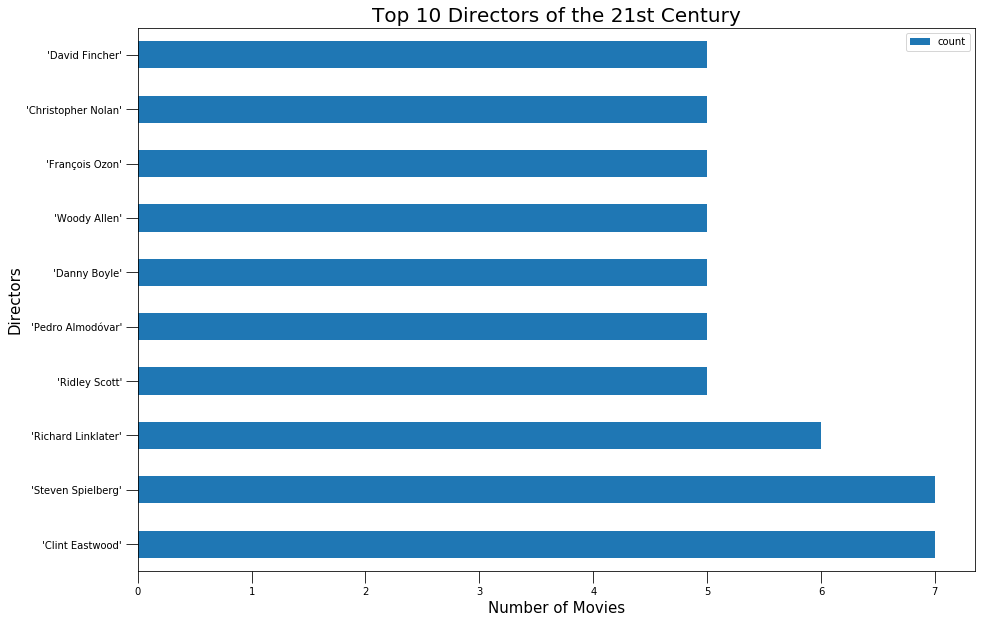

In [73]:
# plot top 10 directors and the number of movies each created
director_plot = d1.plot('directors', 'count', kind='barh', figsize=(15,10))

director_plot.set_xlabel('Number of Movies', size=15)
director_plot.set_ylabel('Directors', size=15)
director_plot.set_title('Top 10 Directors of the 21st Century', size=20)
director_plot.tick_params(axis='x', size=12)
director_plot.tick_params(axis='y', size=12)